# Exercícios

#### Regressão Linear Múltipla

---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 0px; right: 40px; border-radius: 5px;" />

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

sns.set()

## Q1. Previsão do Saldo Médio do Cartão de Crédito

Neste case, você deverá aplicar a regressão linear múltipla para estimar o saldo médido do cartão de crédito de clientes de um banco, a partir das demais informações contidas no conjunto de dados (`credit_regression.csv`), os quais são descritos abaixo. Aplique a regressão linear, utilizando o `LinearRegression` do `sklearn` e, também, o `OLS` do `statsmodels`.

* ID - Identificação
* Income - Renda
* Limit - Limite de crédito
* Rating - Score do Serasa
* Age - Idade
* Education - Anos de educação
* Gender - Gênero
* Student - É estudante? (Sim ou Não)
* Married - É casado(a)? (Sim ou Não)
* Ethnicity - Afro-americano, asiático ou branco
* Balance - Saldo médio do cartão de crédito em dólares

> [Link para o download do dataset](https://s3-sa-east-1.amazonaws.com/lcpi/ab0a9e91-89d1-4897-b384-51a86c50b804.csv)

In [5]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/ab0a9e91-89d1-4897-b384-51a86c50b804.csv', index_col=0)

In [6]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


In [9]:
df.describe(include=['object'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


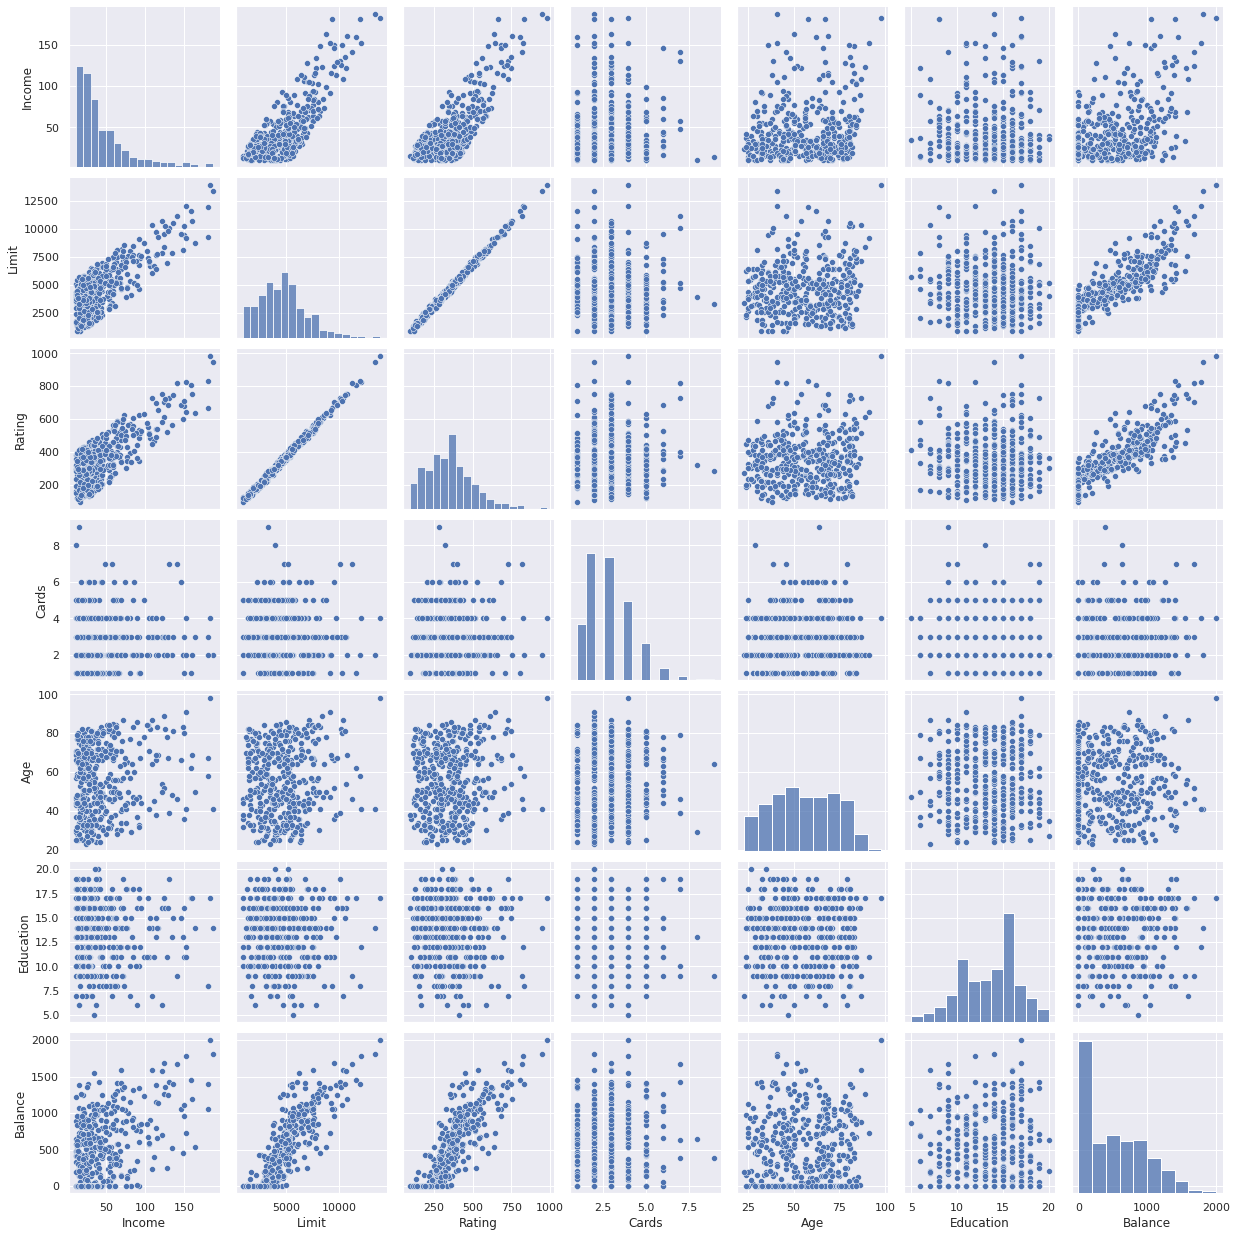

In [10]:
sns.pairplot(df)

<AxesSubplot:>

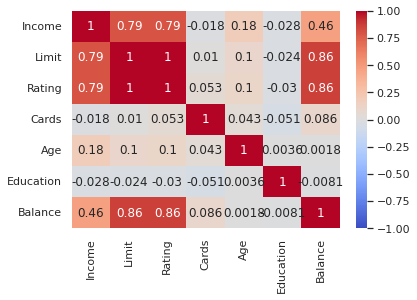

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#### Considerando apenas os dados numéricos

In [16]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [17]:
df_numerical = df.select_dtypes(exclude=['object'])

df_numerical

,Income,Limit,Rating,Cards,Age,Education,Balance
1,14.891,3606,283,2,34,11,333
2,106.025,6645,483,3,82,15,903
3,104.593,7075,514,4,71,11,580
4,148.924,9504,681,3,36,11,964
5,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,560
397,13.364,3838,296,5,65,17,480
398,57.872,4171,321,5,67,12,138
399,37.728,2525,192,1,44,13,0


In [18]:
X1 = df_numerical.drop(columns=['Balance', 'Limit'])
y1 = df_numerical['Balance']

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=2)

In [25]:
cross_validate(estimator=LinearRegression(), X=X_train1, y=y_train1,\
               scoring='r2', return_train_score=True, cv=5)

{'fit_time': array([0.00315905, 0.00282454, 0.00301814, 0.00224638, 0.00200176]),
 'score_time': array([0.00181055, 0.00156999, 0.00220466, 0.00154996, 0.00135303]),
 'test_score': array([0.89373135, 0.84634263, 0.87989221, 0.86404874, 0.87280244]),
 'train_score': array([0.8707384 , 0.88223958, 0.87324033, 0.87874574, 0.87582517])}

In [26]:
lr1 = LinearRegression().fit(X_train1, y_train1)

In [35]:
y_pred1 = lr1.predict(X_test1)

In [36]:
y_pred1[:5]

array([ 163.76866953,  665.72660976, 1009.01327997,  619.95931696,
        966.25645319])

In [37]:
y_test1[:5]

95        0
33      526
226    1075
158    1020
357     962
Name: Balance, dtype: int64

In [38]:
resids1 = y_test1 - y_pred1

In [42]:
def plot_resids(resids, y_true):
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, resids)
    
    plt.subplot(1, 2, 2)
    sns.histplot(resids, kde=True)

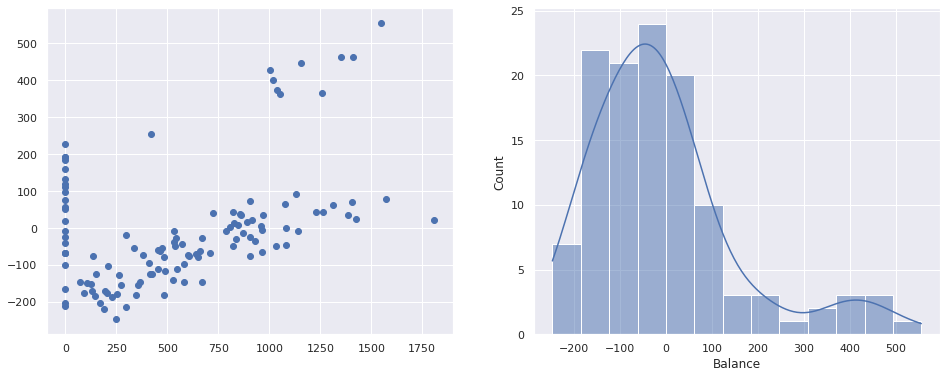

In [43]:
plot_resids(resids1, y_test1)

### Criando um novo modelo (nova coluna: ativos)

In [44]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [47]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [48]:
df_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [51]:
df_dummies['Active'] = df['Balance'].map(lambda balance: 0 if balance == 0 else 1)

In [53]:
df_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Active
1,14.891,3606,283,2,34,11,333,0,0,1,0,1,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0,1
3,104.593,7075,514,4,71,11,580,0,0,0,1,0,1
4,148.924,9504,681,3,36,11,964,1,0,0,1,0,1
5,55.882,4897,357,2,68,16,331,0,0,1,0,1,1


In [70]:
X2 = df_dummies.drop(columns=['Balance'])
y2 = df_dummies['Balance']

In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=2)

In [72]:
cross_validate(estimator=LinearRegression(), X=X_train2, y=y_train2,\
               scoring='r2', return_train_score=True, cv=5)

{'fit_time': array([0.00666666, 0.00480413, 0.00267434, 0.00499916, 0.00290418]),
 'score_time': array([0.00287557, 0.00469661, 0.00237179, 0.00172663, 0.00284672]),
 'test_score': array([0.96674331, 0.9634347 , 0.98439515, 0.96480444, 0.96224992]),
 'train_score': array([0.9731754 , 0.97387166, 0.96849789, 0.97392221, 0.97375728])}

In [73]:
lr2 = LinearRegression().fit(X_train2, y_train2)

In [74]:
y_pred2 = lr2.predict(X_test2)

In [75]:
resids2 = y_test2 - y_pred2

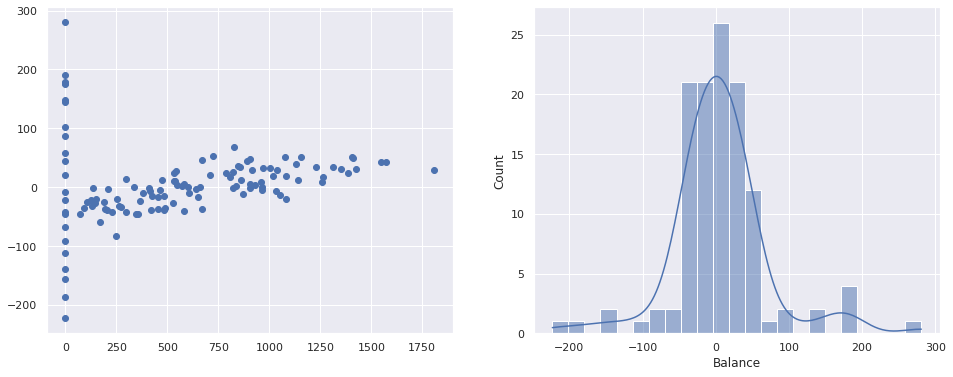

In [76]:
plot_resids(resids2, y_test2)

In [65]:
y_pred2[:5]

array([ 186.04083363,  552.34056707, 1023.17601592, 1000.67385171,
        962.1202887 ])

In [67]:
y_test2[:5].values

array([   0,  526, 1075, 1020,  962])

In [78]:
x2 = sm.add_constant(X2)
model = sm.OLS(y2, x2).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1237.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          4.79e-300
Time:                        14:34:17   Log-Likelihood:                -2284.8
No. Observations:                 400   AIC:                             4596.
Df Residuals:                     387   BIC:                             4647.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -444.7111     27.018    -16.460      0.000    -497.832    -391.590
Income                 -9.4540      0.201    -47.093      0.000      -9.849      -9.059
Limit                   0.2516      0.025     10.090      0.000       0.203       0.301
Rating                  0.8967      0.370      2.424      0.016       0.169       1.624
Cards                  21.4099      3.277      6.534      0.000      14.968      27.852
Age                    -0.6406      0.221     -2.893      0.004      -1.076      -0.205
Education              -1.6635      1.204     -1.382      0.168      -4.031       0.704
Gender_Female          -5.0282      7.474     -0.673      0.502     -19.723       9.667
Student_Yes           484.8031     13.053     37.141      0.000     459.140     510.467
Married_Yes            -1.5870      7.815     -0.203      0.839     -16.953      13.779
Ethnicity_Asian         5.8277     10.653      0.547      0.585     -15.118      26.773
Ethnicity_Caucasian    13.2097      9.198      1.436      0.152      -4.875      31.294
Active               -226.9027     13.167    -17.233      0.000    -252.790    -201.015
==============================================================================
Omnibus:                       39.815   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.466
Skew:                          -0.192   Prob(JB):                     9.76e-43
Kurtosis:                       6.385   Cond. No.                     3.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

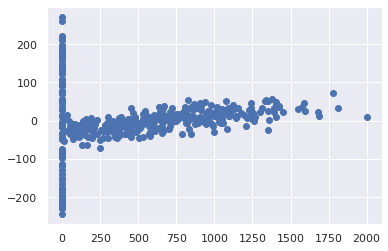

In [80]:
plt.scatter(y2, model.resid)

### Considerando apenas os ativos (`Balance != 0`)

In [81]:
df_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Active
1,14.891,3606,283,2,34,11,333,0,0,1,0,1,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0,1
3,104.593,7075,514,4,71,11,580,0,0,0,1,0,1
4,148.924,9504,681,3,36,11,964,1,0,0,1,0,1
5,55.882,4897,357,2,68,16,331,0,0,1,0,1,1


In [85]:
X_active = df_dummies[df_dummies['Active'] == 1].drop(columns=['Balance', 'Active'])

X_active.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,0,0,1,0,1
2,106.025,6645,483,3,82,15,1,1,1,1,0
3,104.593,7075,514,4,71,11,0,0,0,1,0
4,148.924,9504,681,3,36,11,1,0,0,1,0
5,55.882,4897,357,2,68,16,0,0,1,0,1


In [110]:
y_active = df_dummies[df_dummies['Balance'] > 0]['Balance']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_active, y_active, random_state=2)

In [112]:
lr = LinearRegression().fit(X_train, y_train)

In [113]:
y_pred = lr.predict(X_test)

In [114]:
resids = y_test - y_pred

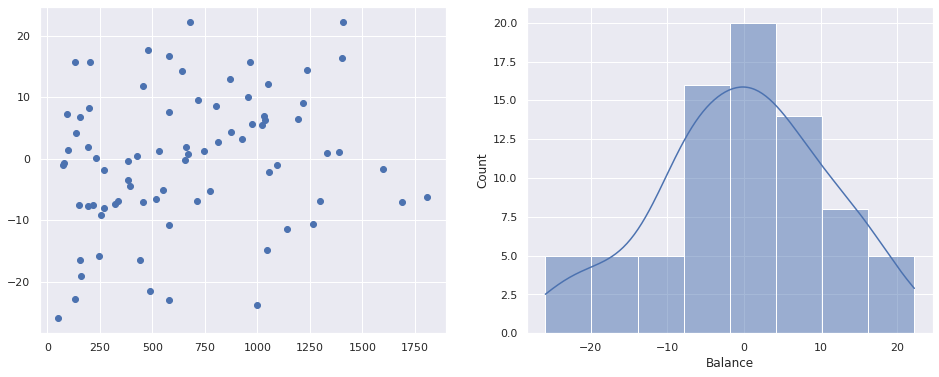

In [116]:
plot_resids(resids=resids, y_true=y_test)

#### Statsmodels

In [118]:
x_train = sm.add_constant(X_train)

model = sm.OLS(y_train, x_train).fit()

In [119]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.188e+04
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:53:39   Log-Likelihood:                -865.88
No. Observations:                 232   AIC:                             1756.
Df Residuals:                     220   BIC:                             1797.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -696.6498      5.087   -136.952      0.000    -706.675    -686.625
Income                 -9.9924      0.035   -286.450      0.000     -10.061      -9.924
Limit                   0.3388      0.005     74.884      0.000       0.330       0.348
Rating                 -0.1893      0.067     -2.833      0.005      -0.321      -0.058
Cards                  26.0551      0.578     45.063      0.000      24.916      27.195
Age                    -0.9963      0.041    -24.358      0.000      -1.077      -0.916
Education               0.1099      0.221      0.496      0.620      -0.326       0.546
Gender_Female           0.4131      1.385      0.298      0.766      -2.317       3.144
Student_Yes           499.5977      2.122    235.400      0.000     495.415     503.780
Married_Yes            -1.7974      1.476     -1.218      0.224      -4.706       1.111
Ethnicity_Asian        -2.1174      2.047     -1.035      0.302      -6.151       1.916
Ethnicity_Caucasian    -0.8905      1.718     -0.518      0.605      -4.277       2.496
==============================================================================
Omnibus:                        3.540   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.226
Skew:                          -0.280   Prob(JB):                        0.199
Kurtosis:                       3.144   Cond. No.                     4.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
vars(model._results)

{'params': array([-6.96649824e+02, -9.99244087e+00,  3.38828966e-01, -1.89295652e-01,
         2.60551225e+01, -9.96264822e-01,  1.09856318e-01,  4.13133314e-01,
         4.99597660e+02, -1.79740143e+00, -2.11739184e+00, -8.90501398e-01]),
 'model': <statsmodels.regression.linear_model.OLS at 0x7f25e5ebcd60>,
 'k_constant': 1,
 '_data_attr': [],
 '_data_in_cache': ['fittedvalues', 'resid', 'wresid'],
 'normalized_cov_params': array([[ 2.40172241e-01,  5.44400761e-04,  5.06822845e-05,
         -9.58210302e-04, -2.58292045e-03, -7.37165071e-04,
         -6.32641570e-03, -4.86878221e-03, -1.02102709e-02,
         -2.79510102e-03, -1.29724630e-02, -2.05435140e-02],
        [ 5.44400761e-04,  1.12946659e-05, -2.21217082e-07,
          7.92730365e-07, -1.09552758e-06, -2.51420025e-06,
         -3.49146598e-06,  1.59222596e-05, -1.28847220e-04,
         -3.30767069e-05,  5.20575836e-05,  3.87461713e-07],
        [ 5.06822845e-05, -2.21217082e-07,  1.90024262e-07,
         -2.77908487e-06,  1.

In [125]:
model._results

In [130]:
model.pvalues

const                  6.269615e-215
Income                 5.229985e-285
Limit                  1.587425e-158
Rating                  5.041558e-03
Cards                  4.622053e-113
Age                     2.165257e-64
Education               6.202544e-01
Gender_Female           7.658296e-01
Student_Yes            2.575440e-266
Married_Yes             2.244997e-01
Ethnicity_Asian         3.020306e-01
Ethnicity_Caucasian     6.048275e-01
dtype: float64

In [132]:
X_train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
68,11.187,5099,380,4,69,16,1,0,0,0,0
5,55.882,4897,357,2,68,16,0,0,1,0,1
214,39.422,5245,383,2,44,19,0,0,0,0,0
221,44.847,5765,437,3,53,13,1,1,0,1,0
228,66.989,5614,430,3,47,14,1,0,1,0,1


In [133]:
X_test.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
227,59.879,6906,527,6,78,15,1,0,0,0,1
356,180.682,11966,832,2,58,8,1,0,1,0,0
8,71.408,7114,512,2,87,9,0,0,0,1,0
105,15.846,4768,365,4,53,12,1,0,0,0,1
280,54.319,3063,248,3,59,8,1,1,0,0,1


In [134]:
x_test = sm.add_constant(X_test)

model.predict(x_test)

227    1024.999395
356    1388.650868
8       867.626369
105     743.712917
280     270.843467
          ...     
216     261.798299
231     659.142676
354     424.537663
337     922.808792
205     462.961462
Length: 78, dtype: float64

#### Classificando aqueles que têm `Balance = 0`

In [136]:
df_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Active
1,14.891,3606,283,2,34,11,333,0,0,1,0,1,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0,1
3,104.593,7075,514,4,71,11,580,0,0,0,1,0,1
4,148.924,9504,681,3,36,11,964,1,0,0,1,0,1
5,55.882,4897,357,2,68,16,331,0,0,1,0,1,1


In [137]:
X = df_dummies.drop(columns=['Balance', 'Active'])
y = df_dummies['Active']

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [141]:
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [142]:
y_pred = clf.predict(X_test)

In [144]:
confusion_matrix(y_test, y_pred)

array([[17,  2],
       [ 0, 81]])

In [146]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9980506822612085

## Q2. Estimando o Preço de Venda de Casas

O arquivo `usa_housing.csv` consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

* `Avg. Area Income`: Média da renda dos residentes de onde a casa está localizada.
* `Avg. Area House Age`: Média de idade das casas da mesma cidade.
* `Avg. Area Number of Rooms`: Número médio de quartos para casas na mesma cidade.
* `Avg. Area Number of Bedrooms`: Número médio de quartos para casas na mesma cidade.
* `Area Population`: A população da cidade onde a casa está localizada.
* `Price`: Preço de venda da casa.
* `Address`: Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/7cf57d48-ac3d-4748-9d81-5b4d6677fcff.csv) para fazer o download do dataset.